In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tifffile
import scipy
from scipy.optimize import curve_fit

In [2]:
#Task 1.2 (a) Extract the green channel of the images
imagesList = []
pixel_1 = []
pixel_2 = []
for k in range(0,180,10):
    image = tifffile.imread("expr1\exp1_t{:03d}.tif".format(k))
    gr = image[:,:,1]#only green
    imagesList.append(image[:,:,1]) 
    index = np.random.choice(gr.shape[0], 2, replace=False)  
    pixel_1.append(gr[index[0],index[1]])
    #select index randomly
    index = np.random.choice(gr.shape[0], 2, replace=False)  
    pixel_2.append(gr[index[0],index[1]])
randmPixel = [pixel_1, pixel_2]

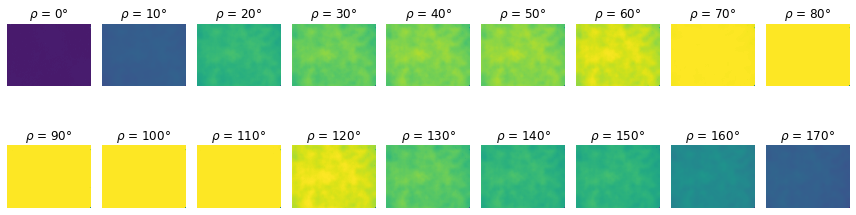

In [3]:
rotationAngle = np.array(np.repeat(np.linspace(0, 170, num=18, dtype= int), 1))
img = np.array(imagesList)
plt.figure(figsize =(12,4))
for k in range(len(img)):
    plt.subplot(2,9,k+1)
    plt.title(r"$\rho$ = " + str(rotationAngle[k]) + "°")
    plt.imshow(img[k,:,:])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
#randmPixel = [img[:,956,1200],img[:,1338,357]]

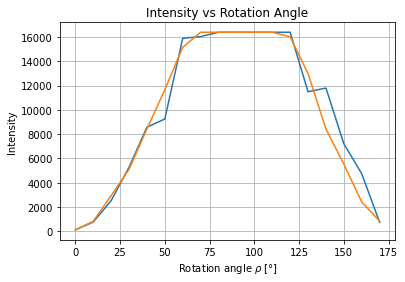

In [5]:
plt.figure()
for intensity in randmPixel:
    plt.plot(rotationAngle,intensity)
plt.xlabel('Rotation angle '+ r'$\rho$ [°]')
plt.ylabel('Intensity')
plt.title('Intensity vs Rotation Angle')
plt.grid()
plt.show()

In [6]:
def calcFourierParam(intensity, rotationAngle):
    a0 = np.mean(intensity)
    a1 = 2*np.mean(intensity*np.sin(2*rotationAngle/180*np.pi))
    b1 = 2*np.mean(intensity*np.cos(2*rotationAngle/180*np.pi))

    transmittance = 2*a0
    retardance = (np.sqrt(a1**2 + b1**2))/a0
    direction_angle = (np.arctan2(-1*a1,b1))/2
    print("\tFourier transmittance: " + str(transmittance))
    print("\tFourier retardance: " + str(retardance))
    print("\tFourier direction_angle: " + str(direction_angle))
    return a0 + a1*np.sin(2*rotationAngle/180*np.pi) +b1*np.cos(2*rotationAngle/180*np.pi)

def calcsin(rho, I, phi, d):
    return I/2*(1 + np.sin(2*(rho - phi)/180*np.pi)*np.sin(d/180*np.pi))

	Fourier transmittance: 19588.88888888889
	Fourier retardance: 0.8553709166189384
	Fourier direction_angle: 1.5100383873412397
	Fourier transmittance: 19150.0
	Fourier retardance: 0.906450987093006
	Fourier direction_angle: 1.5574211180690412


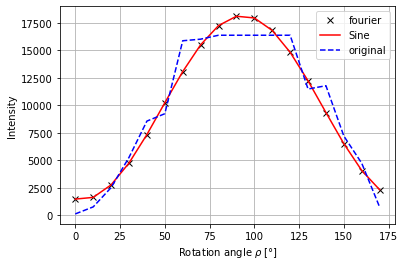

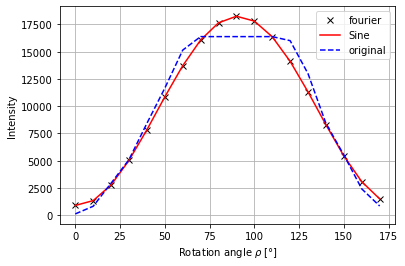

In [7]:
#Task2.3 Fitting function
for intensity in randmPixel:
    Fourier = calcFourierParam(intensity, rotationAngle)
    [transmittance, direction_angle, retardance], _ = curve_fit(calcsin, rotationAngle, intensity)
    Sin = calcsin(rotationAngle, transmittance, direction_angle, retardance)
    plt.figure()
    plt.plot(rotationAngle, Fourier, 'kx', label="fourier")
    plt.plot(rotationAngle, Sin, 'r-', label="Sine")
    plt.plot(rotationAngle, intensity, 'b--', label = "original")
    plt.xlabel('Rotation angle '+ r'$\rho$ [°]')
    plt.ylabel('Intensity')
    plt.grid()
    plt.legend()
plt.show()